# Weather API

In [3]:
import pandas as pd
import requests

/Users/jennamiles/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [77]:
APIkey = '1cf2c4c1-758f-439b-be44-53bc7b97cfee'

In [78]:
sitelist = 'val/wxfcs/all/json/sitelist'

In [79]:
url = f'http://datapoint.metoffice.gov.uk/public/data/{sitelist}?key={APIkey}'

In [80]:
print(url)

http://datapoint.metoffice.gov.uk/public/data/val/wxfcs/all/json/sitelist?key=1cf2c4c1-758f-439b-be44-53bc7b97cfee


In [81]:
r = requests.get(url)
json = r.json()

In [82]:
json.keys()

dict_keys(['Locations'])

In [83]:
df = pd.DataFrame(json['Locations']['Location'])

In [84]:
hackney_locationid = df[df['name']=='Hackney']['id'].values[0]

In [85]:
hackney_locationid

'351713'

In [96]:
df[df['id']=='352817']

,elevation,id,latitude,longitude,name,region,unitaryAuthArea,obsSource,nationalPark
426,5.0,352817,54.1707,-6.3348,Newry,ni,County Armagh,NaN,NaN


In [71]:
#forecast = f'val/wxobs/all/json/{hackney_locationid}'
forecast = f'val/wxobs/all/json/{hackney_locationid}?res=hourly'

In [72]:
url = f'http://datapoint.metoffice.gov.uk/public/data/{forecast}?key={APIkey}'

In [97]:
url = f'http://datapoint.metoffice.gov.uk/public/data/val/wxfcs/all/json/351713?res=3hourly&key={APIkey}'

In [98]:
print(url)

http://datapoint.metoffice.gov.uk/public/data/val/wxfcs/all/json/351713?res=3hourly&key=1cf2c4c1-758f-439b-be44-53bc7b97cfee


In [99]:
r = requests.get(url)

In [100]:
r

<Response [200]>

In [101]:
json = r.json()

In [102]:
json.keys()

dict_keys(['SiteRep'])

In [165]:
data_dic = json
date = data_dic['SiteRep']['DV']['dataDate']
period = data_dic['SiteRep']['DV']['Location']['Period'][0]
day = period['value']
time = period['Rep'][0]['$']
temperature = int((period['Rep'][0]['T']))
feels_like_temperature = int((period['Rep'][0]['F']))
precipitation = int((period['Rep'][0]['Pp']))
location = (data_dic['SiteRep']['DV']['Location']['name'])

In [171]:
pd.DataFrame({'updated datetime':[date]
              , 'temp':[temperature]
              , 'feels_like_temp':[feels_like_temperature]
              , 'precipitation':[precipitation]
              , 'loc':[location]
             })

,updated datetime,temp,feels_like_temp,precipitation,loc
0,2021-05-05T09:00:00Z,5,2,1,HACKNEY


In [180]:
#try looping through to update witht he forecast 
forecast_data = pd.DataFrame()
for i in [0,1,2,3,4]:
    period = data_dic['SiteRep']['DV']['Location']['Period'][i]
    to_append = pd.DataFrame({ 'location':[(data_dic['SiteRep']['DV']['Location']['name'])]
              , 'date':[period['value']]
              , 'temp':[int((period['Rep'][0]['T']))]
              , 'feels_like_temp':[int((period['Rep'][0]['F']))]
              , 'precipitation':[int((period['Rep'][0]['Pp']))]
             })
    
    forecast_data = forecast_data.append(to_append)

In [181]:
forecast_data

,location,date,temp,feels_like_temp,precipitation
0,HACKNEY,2021-05-05Z,5,2,1
0,HACKNEY,2021-05-06Z,5,3,0
0,HACKNEY,2021-05-07Z,7,4,0
0,HACKNEY,2021-05-08Z,7,6,4
0,HACKNEY,2021-05-09Z,13,10,8


- Historic weather data for Hackney

In [295]:
import matplotlib.pyplot as plt
from utils import style

https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series
https://www.metoffice.gov.uk/research/climate/maps-and-data/data/legacy-uk-climate-series

Below is from: 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/UK.txt'

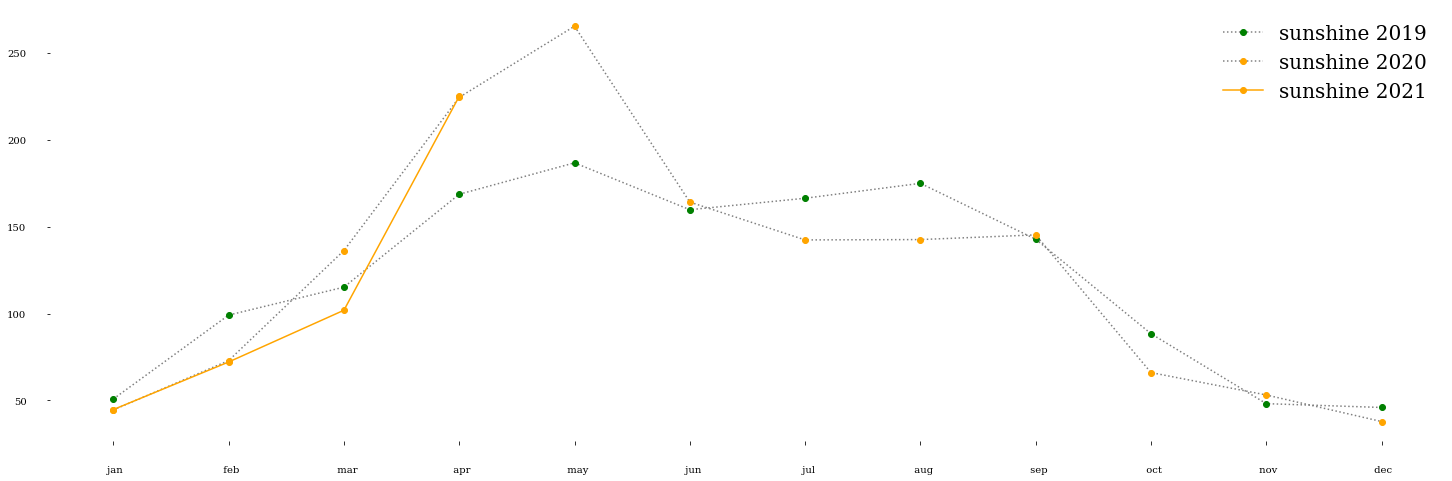

In [300]:
data = pd.read_fwf("historic_sunshine.txt", delimiter= '\s+')
recent_data = data[data.year.isin([2019,2020,2021])].set_index('year')
df_years = recent_data[[' jan', '  feb', '  mar', '  apr', '  may', '  jun', '  jul', '  aug',
       '  sep', '  oct', ' nov', ' dec']]
fig, axes = plt.subplots(nrows=1, ncols=1,figsize = (25,8))

axes.plot(df_years.loc[2019], marker = 'o', color = 'grey', label = 'sunshine 2019'
          , linestyle = ':', markerfacecolor = 'green', markeredgecolor = 'green')
axes.plot(df_years.loc[2020], marker = 'o', color = 'grey', label = 'sunshine 2020'
          , linestyle = ':', markerfacecolor = 'orange', markeredgecolor = 'orange')
axes.plot(df_years.loc[2021][[' jan', '  feb', '  mar', '  apr']], marker = 'o', color = 'orange', label = 'sunshine 2021')
axes.set_frame_on(False)
plt.legend(frameon = False)
plt.tight_layout
plt.show()

In [302]:
recent_data.columns

Index(['  jan', '  feb', '  mar', '  apr', '  may', '  jun', '  jul', '  aug',
       '  sep', '  oct', '  nov', '  dec', '  win', '  spr', '  sum', '  aut',
       '   ann'],
      dtype='object')

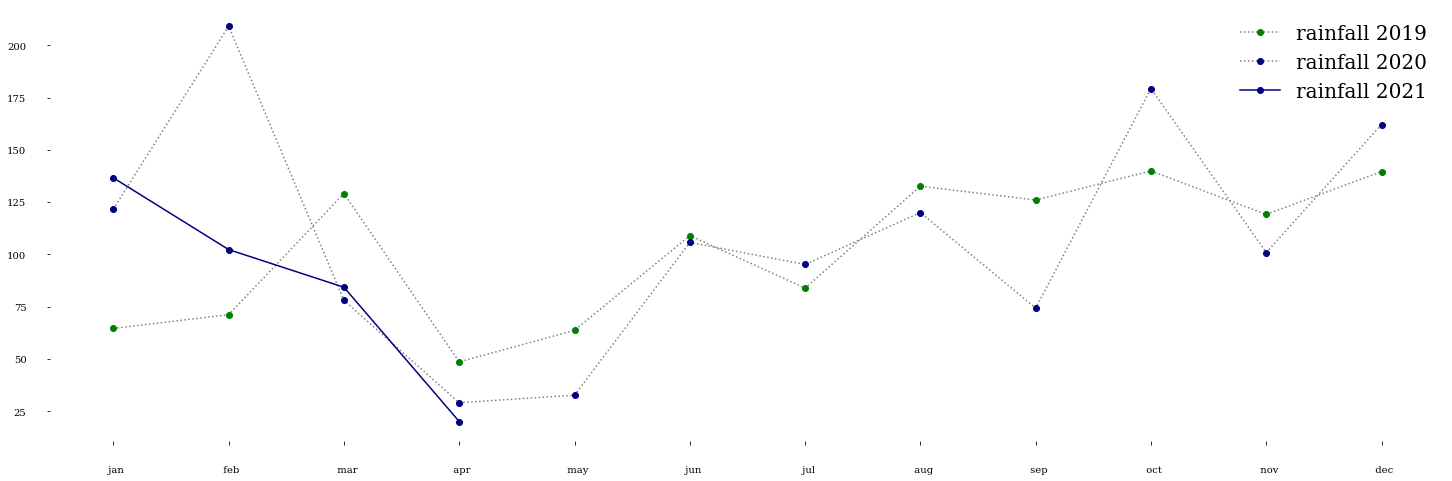

In [309]:
data = pd.read_fwf("historic_rainfall.txt", delimiter= '\s+')
recent_data = data[data.year.isin([2019,2020,2021])].set_index('year')
df_years = recent_data[['  jan', '  feb', '  mar', '  apr', '  may', '  jun', '  jul', '  aug',
       '  sep', '  oct', '  nov', '  dec']]
fig, axes = plt.subplots(nrows=1, ncols=1,figsize = (25,8))

axes.plot(df_years.loc[2019], marker = 'o', color = 'grey', label = 'rainfall 2019'
          , linestyle = ':', markerfacecolor = 'green', markeredgecolor = 'green')
axes.plot(df_years.loc[2020], marker = 'o', color = 'grey', label = 'rainfall 2020'
          , linestyle = ':', markerfacecolor = 'navy', markeredgecolor = 'navy')
axes.plot(df_years.loc[2021][['  jan', '  feb', '  mar', '  apr']], marker = 'o', color = 'navy', label = 'rainfall 2021')
axes.set_frame_on(False)
plt.legend(frameon = False)
plt.tight_layout
plt.show()

In [312]:
recent_data.columns

Index(['jan', 'feb', ' mar', ' apr', ' may', ' jun', ' jul', ' aug', ' sep',
       ' oct', ' nov', 'dec', ' win', '  spr', '  sum', '  aut', '  ann'],
      dtype='object')

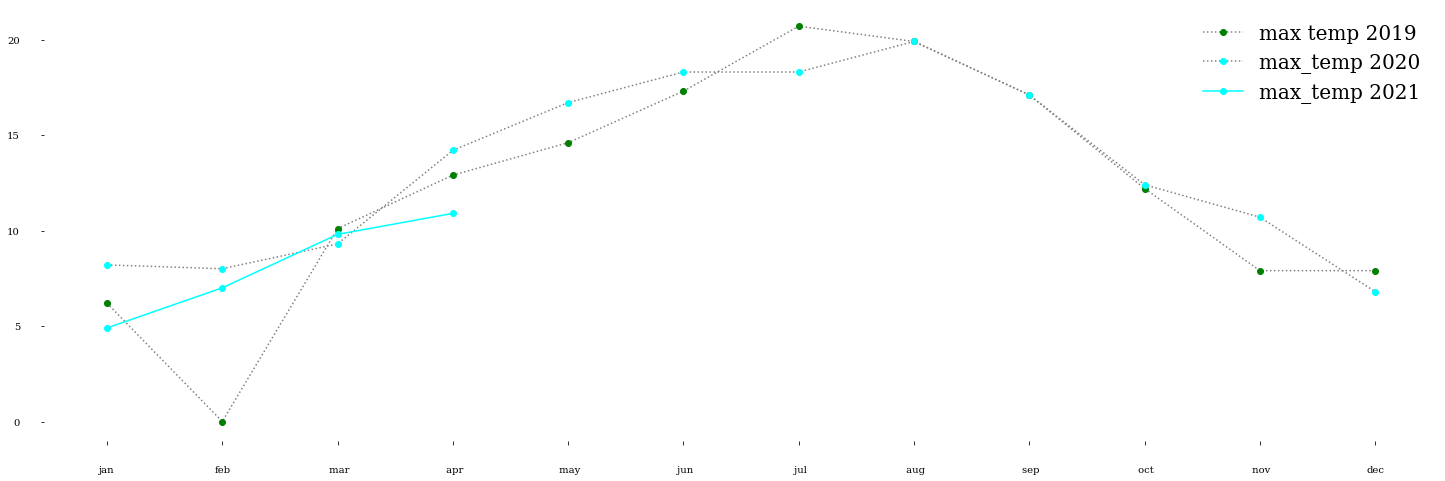

In [315]:
data = pd.read_fwf("historic_maxtemp.txt", delimiter= '\s+')
recent_data = data[data.year.isin([2019,2020,2021])].set_index('year')
df_years = recent_data[['jan', 'feb', ' mar', ' apr', ' may', ' jun', ' jul', ' aug', ' sep',
       ' oct', ' nov', 'dec']]
fig, axes = plt.subplots(nrows=1, ncols=1,figsize = (25,8))

axes.plot(df_years.loc[2019], marker = 'o', color = 'grey', label = 'max temp 2019'
          , linestyle = ':', markerfacecolor = 'green', markeredgecolor = 'green')
axes.plot(df_years.loc[2020], marker = 'o', color = 'grey', label = 'max_temp 2020'
          , linestyle = ':', markerfacecolor = 'cyan', markeredgecolor = 'cyan')
axes.plot(df_years.loc[2021][['jan', 'feb', ' mar', ' apr']], marker = 'o', color = 'cyan', label = 'max_temp 2021')
axes.set_frame_on(False)
plt.legend(frameon = False)
plt.tight_layout
plt.show()

In [317]:
recent_data.columns

Index([' jan', ' feb', 'mar', 'apr', ' may', ' jun', ' jul', ' aug', ' sep',
       ' oct', 'nov', ' dec', '  win', ' spr', '  sum', '  aut', ' ann'],
      dtype='object')

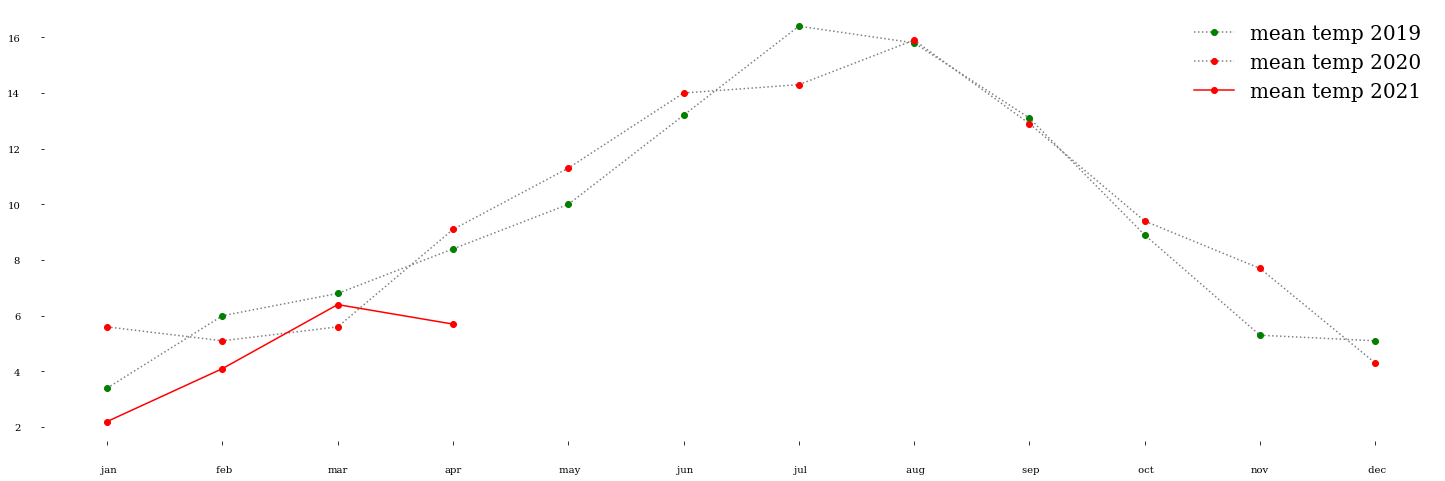

In [321]:
data = pd.read_fwf("historic_meantemp.txt", delimiter= '\s+')
recent_data = data[data.year.isin([2019,2020,2021])].set_index('year')
df_years = recent_data[[' jan', ' feb', 'mar', 'apr', ' may', ' jun', ' jul', ' aug', ' sep',
       ' oct', 'nov', ' dec']]
fig, axes = plt.subplots(nrows=1, ncols=1,figsize = (25,8))

axes.plot(df_years.loc[2019], marker = 'o', color = 'grey', label = 'mean temp 2019'
          , linestyle = ':', markerfacecolor = 'green', markeredgecolor = 'green')
axes.plot(df_years.loc[2020], marker = 'o', color = 'grey', label = 'mean temp 2020'
          , linestyle = ':', markerfacecolor = 'red', markeredgecolor = 'red')
axes.plot(df_years.loc[2021][[' jan', ' feb', 'mar', 'apr']], marker = 'o', color = 'red', label = 'mean temp 2021')
axes.set_frame_on(False)
plt.legend(frameon = False)
plt.tight_layout
plt.show()